In [112]:
# import des modules nécessaires
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.patches as mpatches
from distinctipy import distinctipy
from matplotlib.font_manager import FontProperties
from matplotlib import rc
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import clear_output, display
from scipy.stats import chi2_contingency as chi2_contingency
import statsmodels.formula.api as statsapi
import statsmodels as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import xlrd as xlrd
from matplotlib import font_manager # for mac users
import platform
import os
from sklearn.decomposition import PCA

# Modifier les paramètres d'affichage de la sortie des commandes dans Jupyter
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

# Pour lister les polices présentes
#fpaths = matplotlib.font_manager.findSystemFonts()
#for i in fpaths:
#    f = matplotlib.font_manager.get_font(i)
#    print(f.family_name)
# import de la police Garamond

system = platform.system()

if system == 'Darwin':  # macOS
  font_path = '/Library/Fonts/GaramondPremrPro.otf'
elif system == 'Windows':
  font_path = 'C:/Windows/Fonts/GARA.TTF'
else:  #  unix
  font_path = 'GARA.TTF'
print(font_path)

garamond_font = FontProperties(fname="/Library/Fonts/GaramondPremrPro.otf",size=14)
#    timesnewroman_font = FontProperties(fname="C:/Windows/Fonts/TIMES.TTF",size=14)

font_manager.findSystemFonts(fontpaths=font_path, fontext="ttf")
font_manager.findfont("Garamond Premier Pro") 

# Définissez la police par défaut pour toute la figure
matplotlib.rcParams['font.family'] = 'Garamond Premier Pro'

/Library/Fonts/GaramondPremrPro.otf


In [3]:
# Chargement des données IRIS
df_iris = pd.read_table("input/dimreduc/iris.data",sep=",")

# Ajout titre colonnes
df_iris.columns=["sepal_length_cm","sepal_width_cm","petal_length_cm","petal_width_cm","iris_class"]

# Verif données
print(df_iris.head(5))
print("Shape des données IRIS: ", df_iris.shape)

   sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm   iris_class
0              4.9             3.0              1.4             0.2  Iris-setosa
1              4.7             3.2              1.3             0.2  Iris-setosa
2              4.6             3.1              1.5             0.2  Iris-setosa
3              5.0             3.6              1.4             0.2  Iris-setosa
4              5.4             3.9              1.7             0.4  Iris-setosa
Shape des données IRIS:  (149, 5)


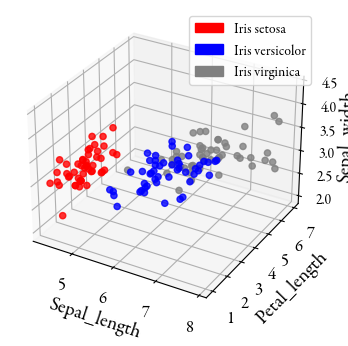

In [116]:
# Projet 1. Q1. 

# Affichage des données IRIS en 3D sur les axes : Sepal_length, Petal_length, Sepal_width

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(projection='3d')
x=df_iris["sepal_length_cm"]
y=df_iris["petal_length_cm"]
z=df_iris["sepal_width_cm"]
colors={"Iris-setosa":"red","Iris-versicolor":"blue","Iris-virginica":"grey"}

red_patch = mpatches.Patch(color='red', label='Iris setosa')
blue_patch = mpatches.Patch(color='blue', label='Iris versicolor')
grey_patch = mpatches.Patch(color='grey', label='Iris virginica')
ax.legend(handles=[red_patch,blue_patch,grey_patch])

sctt=ax.scatter3D(x,y,z,alpha=0.8, c=df_iris["iris_class"].map(colors))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Sepal_length", fontsize=14)
plt.ylabel("Petal_length", fontsize=14)
ax.set_zlabel("Sepal_width", fontsize=14)
ax.zaxis.labelpad=-0.7
plt.show()

/var/folders/8g/9w5gh8y54xd9jss52_tlythr0000gn/T/ipykernel_4803/4294555407.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = df_iris.sub(df_iris.mean()) # Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs


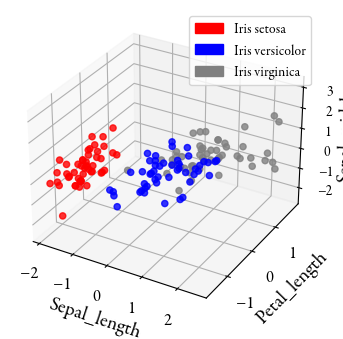

In [115]:
# Projet 1. Q2. 

# Centrer et reduire les données

# Première méthode avec scale
from sklearn.preprocessing import scale
#df_iris_cr = scale(df_iris)

# Seconde méthode pour obtenir directement un dataframe
temp = df_iris.sub(df_iris.mean()) # Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs
df_iris_cr= temp.div(temp.std()) # Divisé les valeurs de la dataframe par l'écart-type de chaque colonne
df_iris_cr["iris_class"]=df_iris["iris_class"]
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(projection='3d')
x=df_iris_cr["sepal_length_cm"]
y=df_iris_cr["petal_length_cm"]
z=df_iris_cr["sepal_width_cm"]
colors={"Iris-setosa":"red","Iris-versicolor":"blue","Iris-virginica":"grey"}

red_patch = mpatches.Patch(color='red', label='Iris setosa')
blue_patch = mpatches.Patch(color='blue', label='Iris versicolor')
grey_patch = mpatches.Patch(color='grey', label='Iris virginica')
ax.legend(handles=[red_patch,blue_patch,grey_patch])

sctt=ax.scatter3D(x,y,z,alpha=0.8, c=df_iris_cr["iris_class"].map(colors))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Sepal_length", fontsize=14)
plt.ylabel("Petal_length", fontsize=14)
ax.set_zlabel("Sepal_width", fontsize=14)
ax.zaxis.labelpad=-0.7
plt.show()

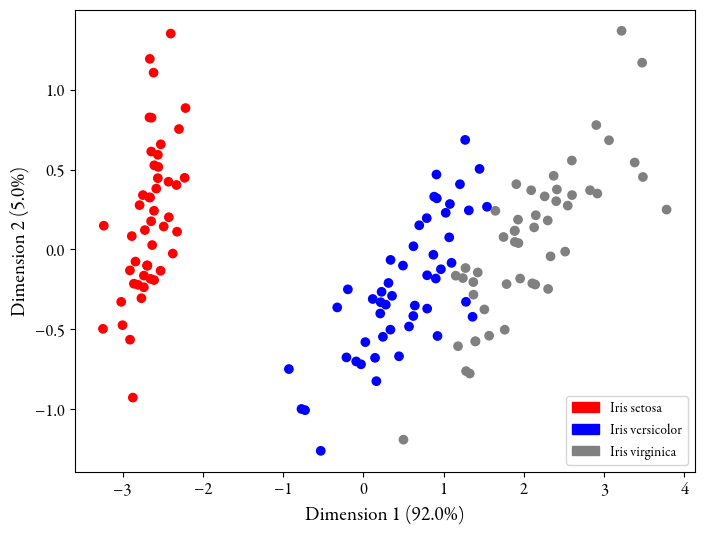

In [117]:
# Projet 1. Q3. 

# Modèle PCA à 2 composants pour expliquer 95% de la variance
pca=PCA(n_components=2)

# Application du modèle aux données Iris brutes
components = pca.fit_transform(df_iris[["sepal_length_cm","sepal_width_cm","petal_length_cm","petal_width_cm"]])
df_pca_rawdatas = pd.DataFrame(data=components)
df_pca_rawdatas_classe = df_pca_rawdatas
df_pca_rawdatas_classe["iris_class"]=df_iris["iris_class"] # Ajout des classes pour la légende

# Affichage des données avec 2 composantes principales, données brutes
labels = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
(fig, ax) = plt.subplots(figsize=(8, 6)) # ax = fig.add_subplot()
colors={"Iris-setosa":"red","Iris-versicolor":"blue","Iris-virginica":"grey"}
sctt=ax.scatter(x=df_pca_rawdatas_classe[0],y=df_pca_rawdatas_classe[1], c=df_pca_rawdatas_classe["iris_class"].map(colors))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Dimension 1 (" + str(round(pca.explained_variance_ratio_[0],2)*100) + "%)", fontsize=14)
plt.ylabel("Dimension 2 (" + str(round(pca.explained_variance_ratio_[1],2)*100) + "%)", fontsize=14)

# Créez une légende avec des labels spécifiques aux catégories d'iris
red_patch = mpatches.Patch(color='red', label='Iris setosa')
blue_patch = mpatches.Patch(color='blue', label='Iris versicolor')
grey_patch = mpatches.Patch(color='grey', label='Iris virginica')
ax.legend(handles=[red_patch,blue_patch,grey_patch])

# Afficher
plt.show()

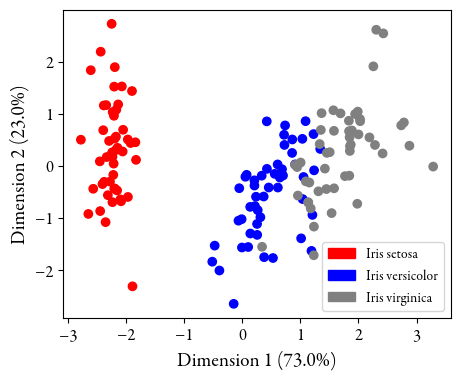

In [118]:
# Projet 1. Q3. 

# Affichage des données avec 2 composantes principales, données centrées réduites

pca=PCA(n_components=2)
components = pca.fit_transform(df_iris_cr[["sepal_length_cm","sepal_width_cm","petal_length_cm","petal_width_cm"]])
df_pca_data_cr = pd.DataFrame(data=components)
df_pca_data_cr_classe = df_pca_data_cr.copy()
df_pca_data_cr_classe["iris_class"]=df_iris_cr["iris_class"]
df_pca_data_cr_classe.rename(columns={0:"PC1",1:"PC2"}, inplace=True)

# Affichage des données avec 2 composantes principales
labels = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
colors={"Iris-setosa":"red","Iris-versicolor":"blue","Iris-virginica":"grey"}

red_patch = mpatches.Patch(color='red', label='Iris setosa')
blue_patch = mpatches.Patch(color='blue', label='Iris versicolor')
grey_patch = mpatches.Patch(color='grey', label='Iris virginica')
ax.legend(handles=[red_patch,blue_patch,grey_patch])

sctt=ax.scatter(x=df_pca_data_cr_classe["PC1"],y=df_pca_data_cr_classe["PC2"], c=df_pca_data_cr_classe["iris_class"].map(colors))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Dimension 1 (" + str(round(pca.explained_variance_ratio_[0],2)*100) + "%)", fontsize=14)
plt.ylabel("Dimension 2 (" + str(round(pca.explained_variance_ratio_[1],2)*100) + "%)", fontsize=14)
plt.show()

In [69]:
# Projet 1. Q4. 

# import libraries. Coefficient de Pearson pour les paires deux à deux
from scipy.stats import pearsonr
import itertools

# suppression de la colonne iris class
df_iris_cr2 = df_iris_cr[["sepal_length_cm","sepal_width_cm","petal_length_cm","petal_width_cm"]]
#print("A ", df_pca_data_cr)
# Corrélation 2 à 2 pour la matrice de corrélation du jeu de données iris
correlations = {}
columns = df_iris_cr2.columns.tolist()
print(columns)
for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + col_b] = pearsonr(df_iris_cr2.loc[:, col_a], df_iris_cr2.loc[:, col_b])

print(type(correlations))
df_result = pd.DataFrame.from_dict(correlations, orient='index')
df_result.reset_index
df_result.columns = [  'PCC', 'p-value']

print(df_result.sort_index())

['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']
<class 'dict'>
                                       PCC       p-value
petal_length_cm__petal_width_cm   0.962314  5.028786e-85
sepal_length_cm__petal_length_cm  0.871283  2.735066e-47
sepal_length_cm__petal_width_cm   0.816971  5.770419e-37
sepal_length_cm__sepal_width_cm  -0.103784  2.078201e-01
sepal_width_cm__petal_length_cm  -0.415218  1.399027e-07
sepal_width_cm__petal_width_cm   -0.350733  1.158174e-05


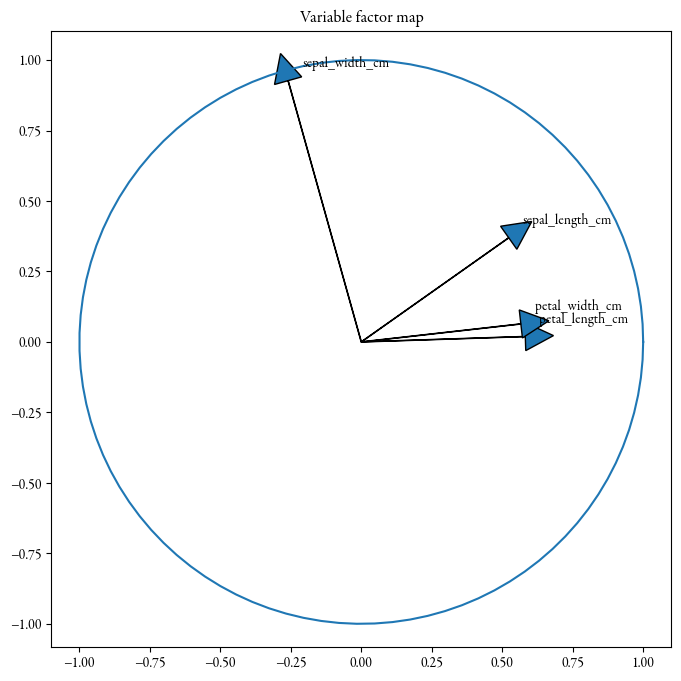

[ 0.52308496 -0.25956935  0.58184289  0.56609604]


In [70]:
# Projet 1. Q5. 

n_components = 4

# Do the PCA
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(df_iris_cr[["sepal_length_cm","sepal_width_cm","petal_length_cm","petal_width_cm"]])

# Append the principle components for each entry to the dataframe
for i in range(0, n_components):
    df_iris_cr['PC' + str(i + 1)] = reduced[:, i]

# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df_iris_cr2.columns.values[i])
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()
print(pca.components_[0])

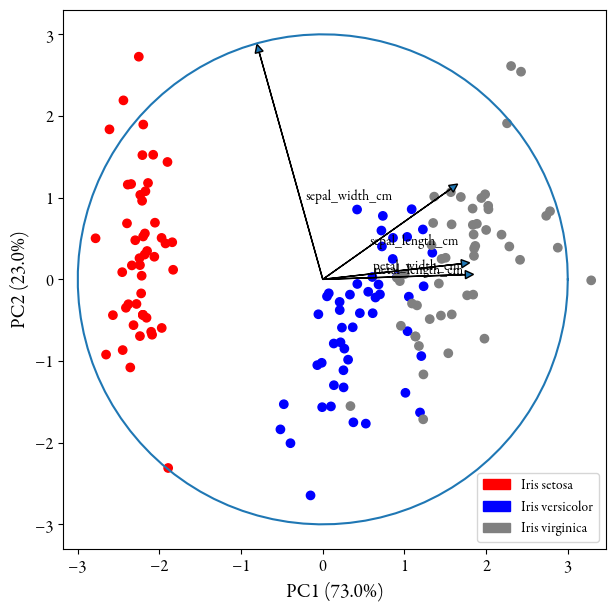

In [111]:
# Projet 1. Q6. 

# Individus et Cercle de corrélation

#from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib import legend_handler
import matplotlib.patches as mpatches

n_components = 4

# Do the PCA
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(df_iris_cr[["sepal_length_cm","sepal_width_cm","petal_length_cm","petal_width_cm"]])

# Affichage des données avec 2 composantes principales
labels = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
colors={"Iris-setosa":"red","Iris-versicolor":"blue","Iris-virginica":"grey"}
sctt=ax.scatter(x=df_iris_cr["PC1"],y=df_iris_cr["PC2"], c=df_iris_cr["iris_class"].map(colors))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("PC1 (" + str(round(pca.explained_variance_ratio_[0],2)*100) + "%)", fontsize=14)
plt.ylabel("PC2 (" + str(round(pca.explained_variance_ratio_[1],2)*100) + "%)", fontsize=14)

red_patch = mpatches.Patch(color='red', label='Iris setosa')
blue_patch = mpatches.Patch(color='blue', label='Iris versicolor')
grey_patch = mpatches.Patch(color='grey', label='Iris virginica')
ax.legend(handles=[red_patch,blue_patch,grey_patch])

# Plot a variable factor map for the first two dimensions.
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             3*pca.components_[0, i],  #0 for PC1
             3*pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df_iris_cr2.columns.values[i])
an = np.linspace(0, 2 * np.pi, 100)
ax = plt.plot(3*np.cos(an), 3*np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show()

[0.72620033 0.23147407 0.03711516 0.00521044]


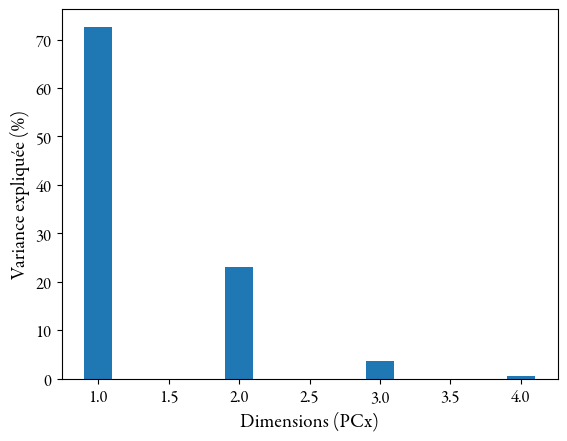

In [11]:
# Projet 1. Q7. 

# ACP des données IRIS. Affichage des variances expliquées
df_iris_cr_sans_irisclasse = df_iris_cr[["sepal_length_cm","sepal_width_cm","petal_length_cm","petal_width_cm"]]
pca=PCA()
pca = pca.fit(df_iris_cr_sans_irisclasse)
print(pca.explained_variance_ratio_) # Les 2 premiers composantes principales amènent 95% de la variance expliquée

# Affichage des variances expliquées avec intitulés, et chosir les 2 plus importants
fig,ax = plt.subplots()
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    100*pca.explained_variance_ratio_,
    width=0.2
    )
plt.xlabel("Dimensions (PCx)", fontsize=14)
plt.ylabel("Variance expliquée (%)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


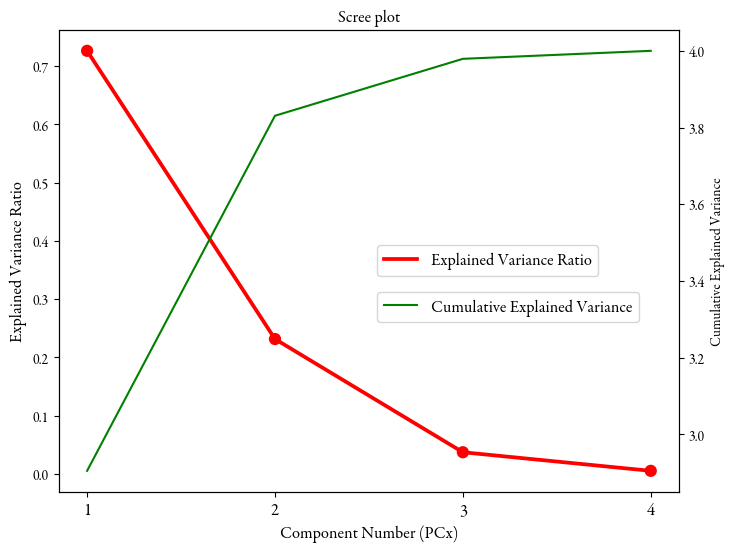

In [12]:
# Projet 1. Q8. 

# Test des batons brisés

# Do a scree plot (ax1)

label=["Explained Variance Ratio"]
ind = np.arange(0, n_components)
(fig, ax1) = plt.subplots(figsize=(8, 6))
ax1 = sns.pointplot(x=ind, y=pca.explained_variance_ratio_,color="red")
ax1.set_xticklabels([1,2,3,4],fontsize=12)
ax1.set_xlabel('Component Number (PCx)',fontsize=12)
ax1.set_title('Scree plot',fontsize=12)
ax1.set_ylabel("Explained Variance Ratio",fontsize=12)
ax1.legend(label,loc="center left", bbox_to_anchor=(0.5,0.5),prop={
               'family': 'Garamond Premier Pro', "size": 12, 'stretch': 'normal'})
# Ligne cumulée (ax2)
ax2=ax1.twinx()
array_ev = pca.explained_variance_.cumsum()
sry = pd.Series(array_ev)
color = 'tab:red'
ax2 = sns.lineplot(sry,ax=ax2,color="green")
ax2.set_ylabel('Cumulative Explained Variance')
label=["Cumulative Explained Variance"]
ax2.set_label(labels)

ax2.legend(label,loc="center left",bbox_to_anchor=(0.5,0.4), prop={
               'family': 'Garamond Premier Pro', "size": 12, 'stretch': 'normal'})
ax2.legend

plt.show()

In [13]:
# Projet 1. Q9.
# 
# importing the modules
from tabulate import tabulate

# Eigen values and vectors
print(pca.components_)
print("Eigen values", len(pca.explained_variance_))
print("Cumulative explained variance", len(array_ev))
print("% Variance", len(100*pca.explained_variance_ratio_))

# Création du DataFrame
dict = {'Eigen values':pca.explained_variance_,
        '% Variance':100*pca.explained_variance_ratio_,
        'Cumulative explained variance':array_ev}
df_tableau = pd.DataFrame(dict)

# Affichage table style
print(tabulate(df_tableau, headers = 'keys', tablefmt = 'simple'))

# Coef de 25 entre Eigen values et % Variance

[[ 0.52308496 -0.25956935  0.58184289  0.56609604]
 [ 0.36956962  0.92681168  0.01912775  0.06381646]
 [-0.72154279  0.2411952   0.13962963  0.63380158]
 [-0.26301409  0.12437342  0.80099722 -0.52321917]]
Eigen values 4
Cumulative explained variance 4
% Variance 4
      Eigen values    % Variance    Cumulative explained variance
--  --------------  ------------  -------------------------------
 0       2.9048        72.62                              2.9048
 1       0.925896      23.1474                            3.8307
 2       0.148461       3.71152                           3.97916
 3       0.0208418      0.521044                          4


In [14]:
# Projet 1. Q10.

# Loading factors

ary = pca.components_ * np.sqrt(pca.explained_variance_)
df_ary=pd.DataFrame()
df_ary["PC"]=["PC1","PC2","PC3","PC4"]
for i in range(4):
    df_ary["Var" + str(i)] = ary[:,i]
df_ary.rename(columns={"Var0":"sepal_length_cm","Var1":"sepal_width_cm","Var2":"petal_length_cm","Var3":"petal_width_cm"},inplace=True)
#print(df_ary.set_index(["PC"]))
print(tabulate(df_ary, headers = 'firstrow', tablefmt = 'fancy_grid'))


╒═════╤═══════╤══════════════════════╤═══════════════════════╤═════════════════════╤══════════════════════╕
│   0 │ PC1   │   0.8915186950037147 │   -0.2497667266787693 │   0.224187487975766 │   0.0817254674021575 │
╞═════╪═══════╪══════════════════════╪═══════════════════════╪═════════════════════╪══════════════════════╡
│   1 │ PC2   │             0.629875 │              0.891811 │          0.00737004 │           0.00921298 │
├─────┼───────┼──────────────────────┼───────────────────────┼─────────────────────┼──────────────────────┤
│   2 │ PC3   │            -1.22976  │              0.232086 │          0.0538001  │           0.0914999  │
├─────┼───────┼──────────────────────┼───────────────────────┼─────────────────────┼──────────────────────┤
│   3 │ PC4   │            -0.448267 │              0.119676 │          0.308629   │          -0.0755355  │
╘═════╧═══════╧══════════════════════╧═══════════════════════╧═════════════════════╧══════════════════════╛


Ci-dessus, les saturations des variables sur les composantes de l'ACP. Pour la CP1 la variable qui a la plus forte saturation est "sepal_length_cm".

In [15]:
# Projet 1. Q.11

# Affichage table style
#print(tabulate(df_tableau, headers = 'keys', tablefmt = 'simple'))
df_ary.style.highlight_max(color = 'grey', axis = 0)

,PC,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,PC1,0.891519,-0.249767,0.224187,0.081725
1,PC2,0.629875,0.891811,0.007370,0.009213
2,PC3,-1.229760,0.232086,0.053800,0.091500
3,PC4,-0.448267,0.119676,0.308629,-0.075535


# Projet 1. Q12.

Les saturations d'une variable selon les différentes composantes d'une ACP représentent les coordonnées de la variable dans le référentels des composantes de l'ACP.

In [16]:
# Projet 1. Q13.

cos2 = (pca.components_)**2

cos2 = pd.DataFrame(cos2.T, columns=['PC1','PC2','PC3','PC4'],index=df_iris_cr_sans_irisclasse.columns)

print(cos2)

                      PC1       PC2       PC3       PC4
sepal_length_cm  0.273618  0.136582  0.520624  0.069176
sepal_width_cm   0.067376  0.858980  0.058175  0.015469
petal_length_cm  0.338541  0.000366  0.019496  0.641597
petal_width_cm   0.320465  0.004073  0.401704  0.273758


A                        PC1       PC2       PC3       PC4
sepal_length_cm  0.273618  0.136582  0.520624  0.069176
sepal_width_cm   0.067376  0.858980  0.058175  0.015469
petal_length_cm  0.338541  0.000366  0.019496  0.641597
petal_width_cm   0.320465  0.004073  0.401704  0.273758
A                        PC1       PC2       PC3       PC4
sepal_width_cm   0.067376  0.858980  0.058175  0.015469
petal_length_cm  0.338541  0.000366  0.019496  0.641597
petal_width_cm   0.320465  0.004073  0.401704  0.273758
A                        PC1       PC2       PC3       PC4
petal_length_cm  0.338541  0.000366  0.019496  0.641597
petal_width_cm   0.320465  0.004073  0.401704  0.273758
A                       PC1       PC2       PC3       PC4
petal_width_cm  0.320465  0.004073  0.401704  0.273758


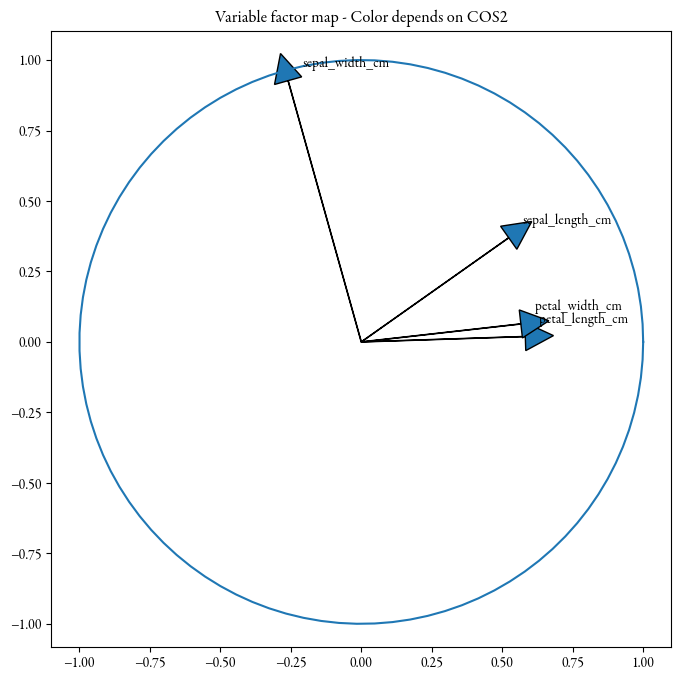

In [17]:
# Cercle des corrélations avec couleurs en fonction du COS2

import matplotlib.colors as colors
import matplotlib.cm as cmx

# dataframe avec les 4 valeurs de couleurs, integer
df_colors = pd.DataFrame()
df_colors["colors"]=()
for i in range(0, pca.components_.shape[1]):
    print("A ", cos2.iloc[i:])
    #print("B ", cos2[pca.components_[1, i]])
    #df_colors["colors"][i]=cos2[pca.components_[0, i]] + cos2[pca.components_[1, i]]
#print(df_colors)
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)
    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df_iris_cr2.columns.values[i])
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map - Color depends on COS2')
plt.show()

/Users/delphine/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


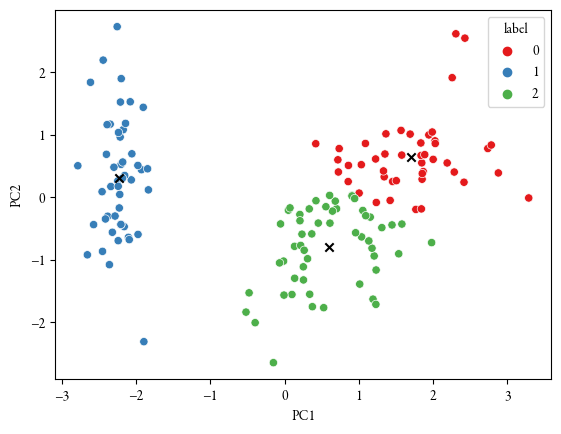

In [123]:
# Projet 1. Q 19

# Import des librairies
from sklearn.cluster import KMeans

# Définition du modèle KMeans
km_sample = KMeans(n_clusters=3,
                   max_iter=500
                  )

# Les données à utiliser
# on utilise les données numériques uniquement issues de la PCA 2 composantes pour tous les individus
df_pca_data_cr.rename(columns={0:"PC1",1:"PC2"}, inplace=True)
colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']

# Application du modèle aux données
km_sample.fit(df_pca_data_cr[['PC1','PC2']])

# Affichage des données et des centroïdes avec les couleurs
labels_sample = km_sample.labels_
df_pca_data_cr['label'] = labels_sample

# Centroid
centers = np.array(km_sample.cluster_centers_)
sns.scatterplot(x=df_pca_data_cr["PC1"],y=df_pca_data_cr["PC2"],hue=df_pca_data_cr['label'],palette='Set1')
plt.scatter(centers[:,0], centers[:,1], marker="x", color='black')

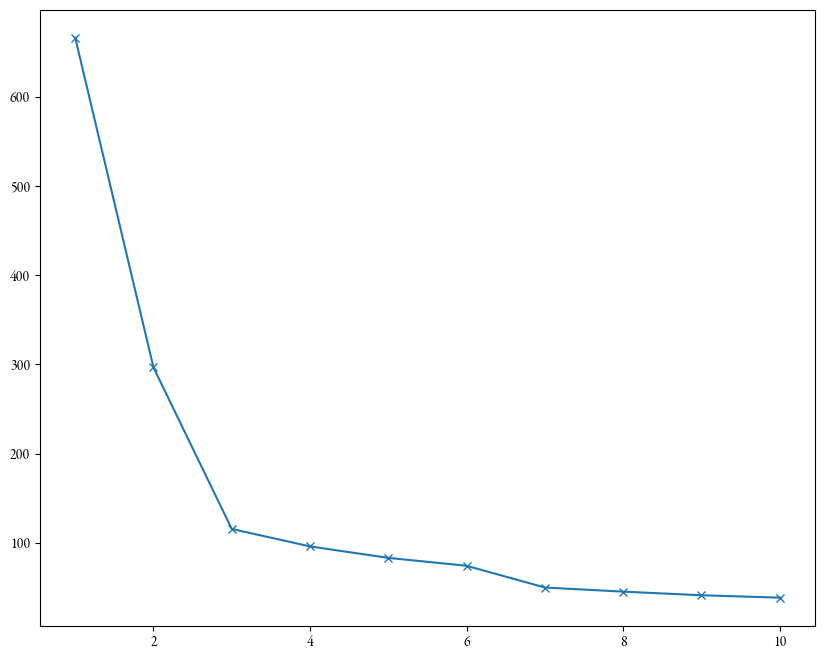

In [126]:
# Display WCSS

wcss=[]
for i in range(1,11):
    kmeans_model=KMeans(n_clusters=i, n_init="auto", init="k-means++", random_state=42)
    kmeans_model.fit(df_pca_data_cr)
    wcss.append(kmeans_model.inertia_)

# Afficher les WCSS

plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker="x",linestyle="-")
plt.show()

          PC1       PC2  label
0   -2.100865 -0.642110      1
1   -2.379944 -0.304805      1
2   -2.317064 -0.561031      1
3   -2.397002  0.685280      1
4   -2.076201  1.525108      1
..        ...       ...    ...
144  1.853520  0.378069      0
145  1.536821 -0.905034      2
146  1.504182  0.263717      0
147  1.364494  1.012424      0
148  0.943621 -0.021748      2

[149 rows x 3 columns]
For n_clusters = 2 The average silhouette_score is : 0.5446736875207346
For n_clusters = 3 The average silhouette_score is : 0.6439073032105301
For n_clusters = 4 The average silhouette_score is : 0.5647248197050774
For n_clusters = 5 The average silhouette_score is : 0.4989971380087569
For n_clusters = 6 The average silhouette_score is : 0.48461868253286866


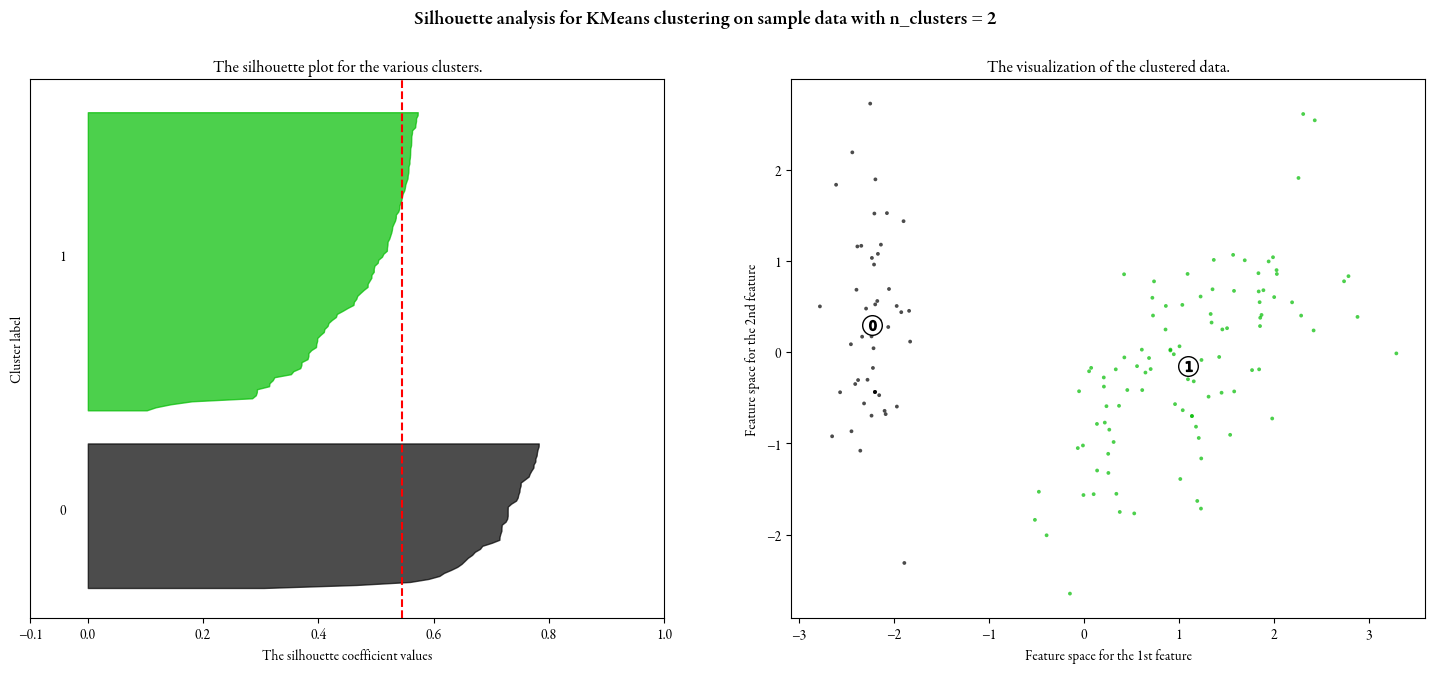

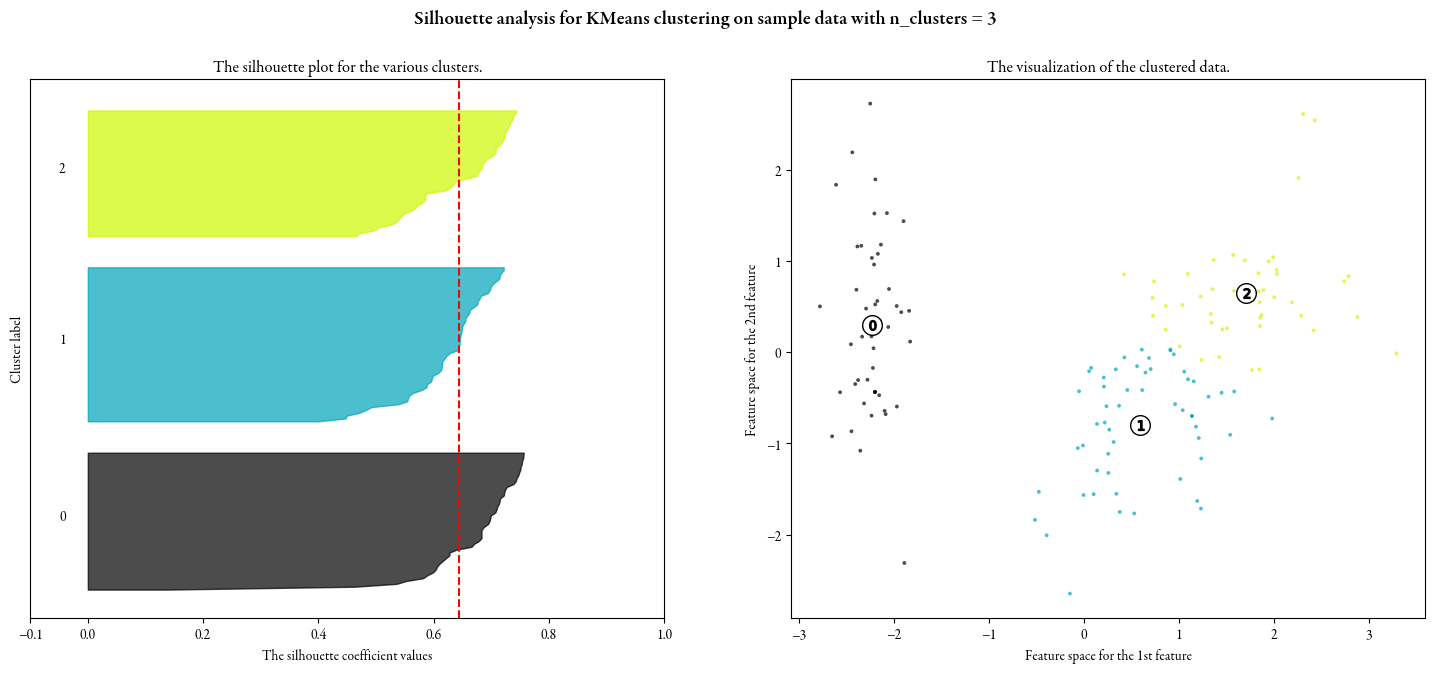

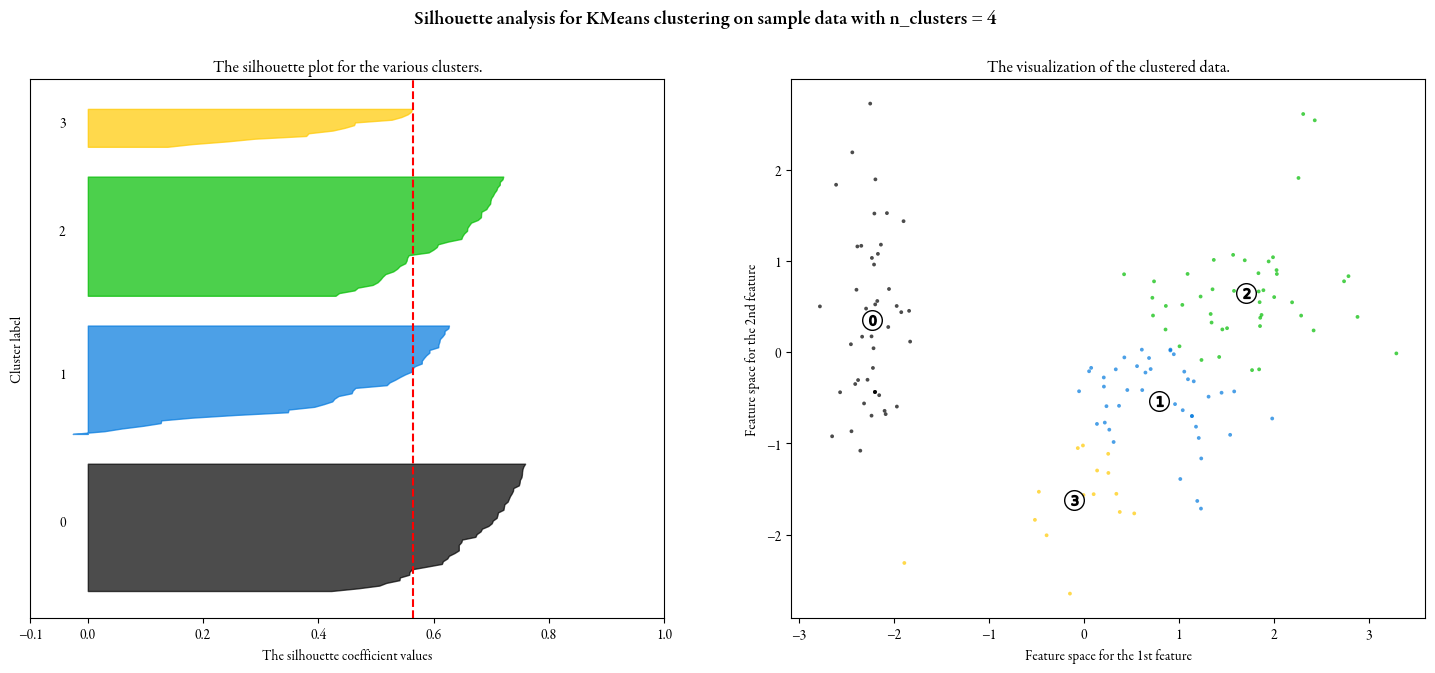

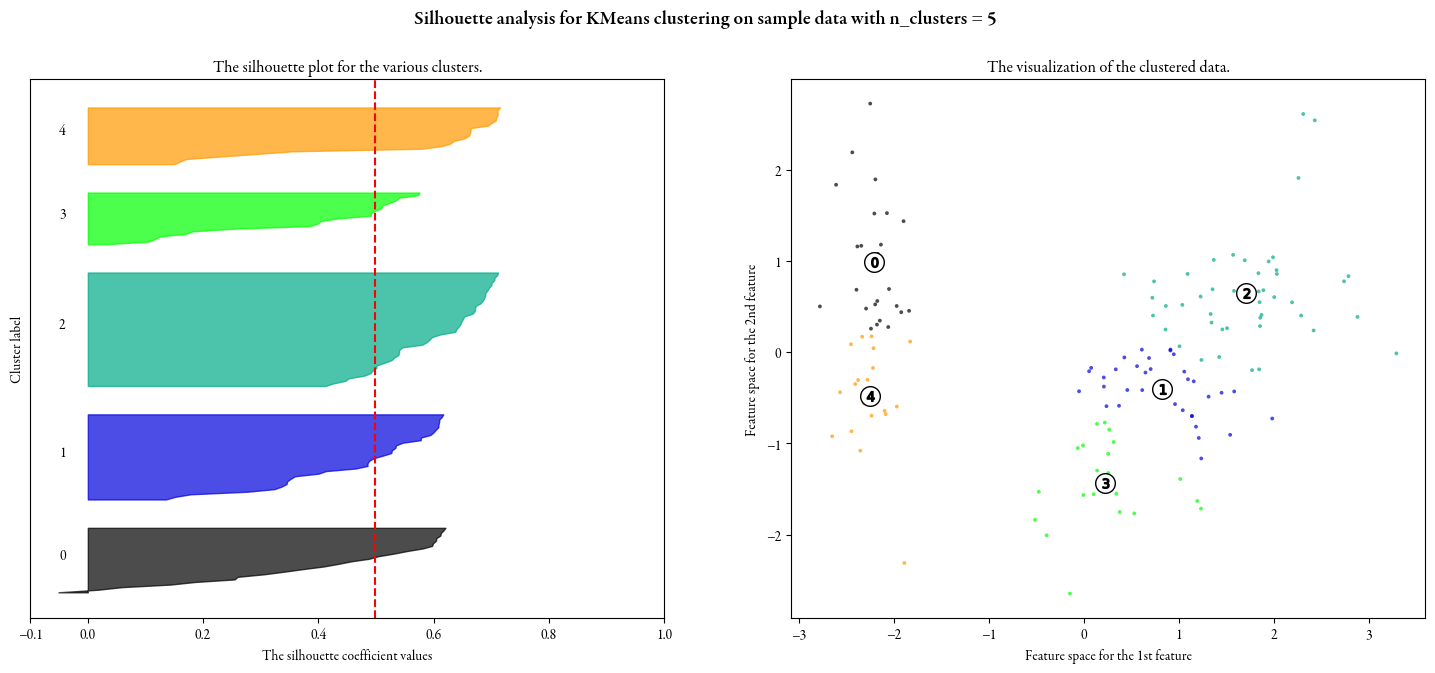

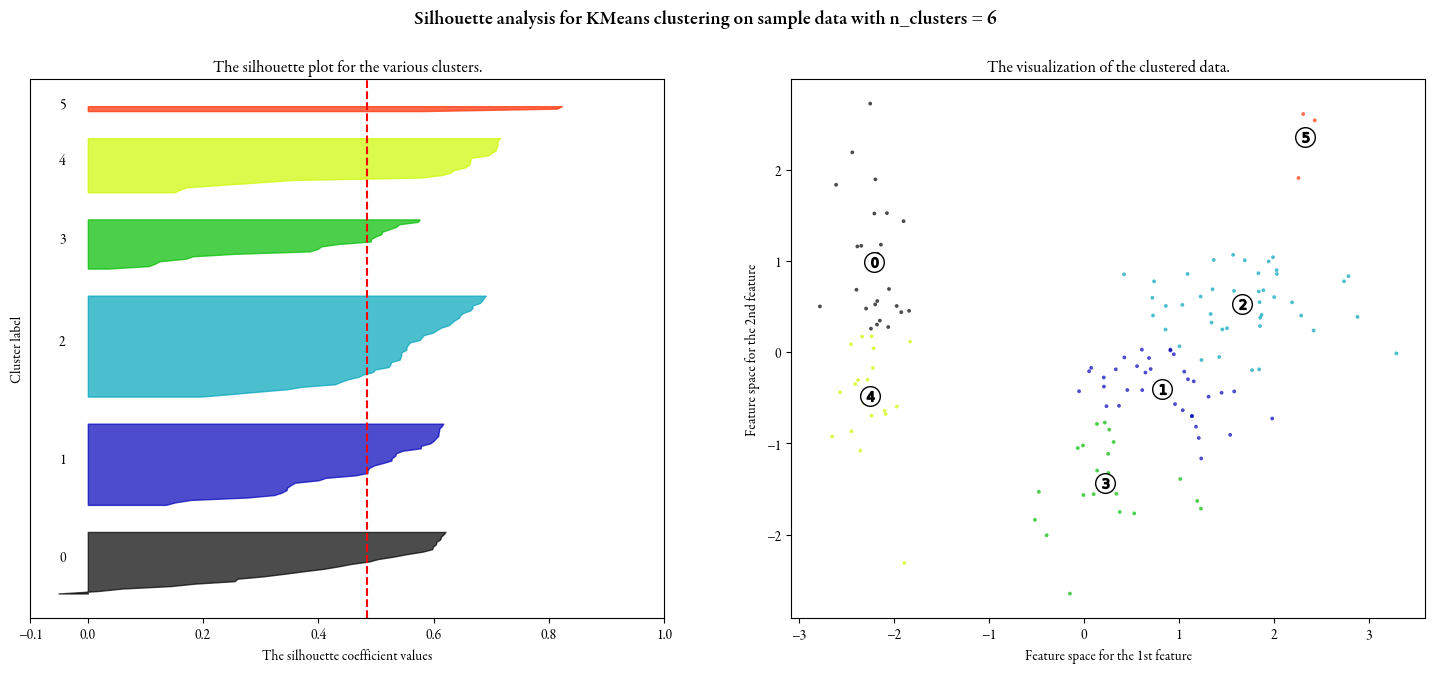

In [131]:
# Silhouette

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

print(df_pca_data_cr)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca_data_cr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca_data_cr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca_data_cr, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca_data_cr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df_pca_data_cr.iloc[:, 0], df_pca_data_cr.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()